# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Функция начального числа используется для хранения случайного метода генерации одних и тех же случайных чисел \
при многократном выполнении кода. random.seed позволяет изменить число, которое передается в random для генерации \
случайного числа, а т.к. случайные числа выдаются одним и тем же алгоритмом, то при одинаковом параметре в random.seed будут и \
одинаковые случайные числа. Это упрощает оптимизацию кодов, когда для тестирования используются случайные числа.")
      

Функция начального числа используется для хранения случайного метода генерации одних и тех же случайных чисел при многократном выполнении кода. random.seed позволяет изменить число, которое передается в random для генерации случайного числа, а т.к. случайные числа выдаются одним и тем же алгоритмом, то при одинаковом параметре в random.seed будут и одинаковые случайные числа. Это упрощает оптимизацию кодов, когда для тестирования используются случайные числа.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



Тренировочные

In [7]:
df_train.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
df_train.describe(include=[np.object])

<ipython-input-8-3eb11047230d>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train.describe(include=[np.object])


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


Тестовые

In [9]:
df_test.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [10]:
df_test.describe(include=[np.object])

<ipython-input-10-6f31e82afce6>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_test.describe(include=[np.object])


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
import missingno as msno

<AxesSubplot:>

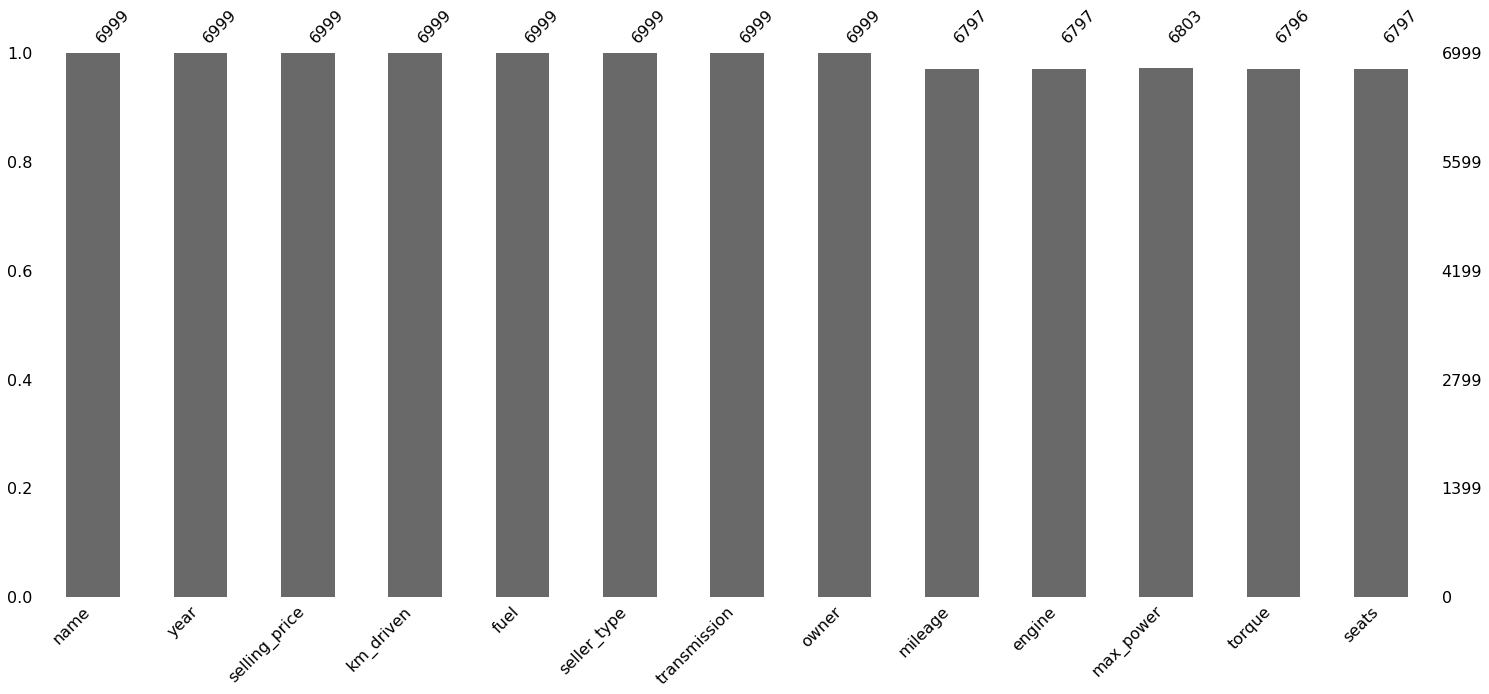

In [12]:
msno.bar(df_train)

<AxesSubplot:>

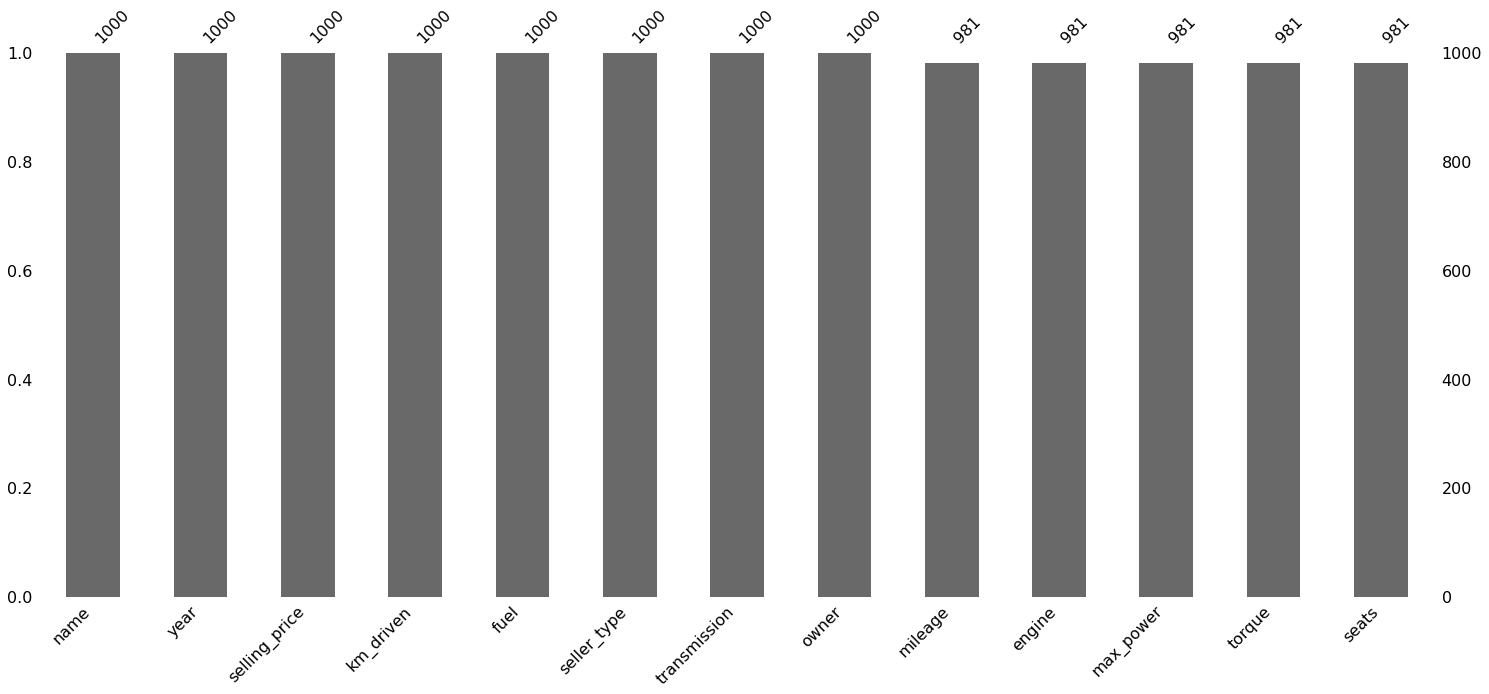

In [13]:
msno.bar(df_test)

Пропуски присутсвуют в нескольких колонках - mileage, engine, max_power, torque и seats

In [14]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [15]:
df_duplicated = df_train[df_train.duplicated(['name', 'year', "km_driven","fuel", "seller_type","transmission", "owner","mileage", "engine", "max_power", "torque", "seats" ])]


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [16]:
df_duplicated.sort_values(by=["name", "year"]).head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1784,BMW 3 Series 320d Luxury Line,2012,1300000,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0
4050,BMW 3 Series 320d Luxury Line Plus,2017,2600000,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0
1787,BMW 3 Series 320d Luxury Plus,2013,1300000,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0


In [17]:
df_train[df_train["name"] == "Audi Q5 3.0 TDI Quattro"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [18]:
df_train = df_train.drop_duplicates(['name', 'year', "km_driven","fuel", "seller_type","transmission", "owner","mileage", "engine", "max_power", "torque", "seats"], keep="first")


In [19]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [20]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [21]:
df_train = df_train.reset_index().drop(columns = "index")

In [22]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>


> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [23]:
import re
list_col = ["mileage", 'engine', 'max_power']
for i in list_col:
    df_train[i] = df_train[i].str.extractall('([-+]?\d*\.?\d+)').astype(float).unstack().max(axis=1)
    df_test[i] = df_test[i].str.extractall('([-+]?\d*\.?\d+)').astype(float).unstack().max(axis=1)

In [24]:
df_train = df_train.drop(columns="torque")
df_test = df_test.drop(columns="torque")

In [25]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [26]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [27]:
df_train['mileage'].fillna(df_train['mileage'].mean(), inplace = True)
df_train["engine"].fillna(df_train['engine'].mean(), inplace = True)
df_train["max_power"].fillna(df_train['max_power'].mean(), inplace = True)
df_train["seats"].fillna(df_train['seats'].mean(), inplace = True)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


In [29]:
df_test['mileage'].fillna(df_train['mileage'].mean(), inplace = True)
df_test["engine"].fillna(df_train['engine'].mean(), inplace = True)
df_test["max_power"].fillna(df_train['max_power'].mean(), inplace = True)
df_test["seats"].fillna(df_train['seats'].mean(), inplace = True)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [31]:
df_train['seats'] = df_train['seats'].astype(int)
df_train['engine'] = df_train['engine'].astype(int)

df_test['seats'] = df_test['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [34]:
("Можно заметить, что подавляющее количество машин имеют 5 мест, другие же имеет на столько маленькое число, что возможно плохо наша модель может обучиться на этих данных. Более того, машины которые имеют больше 5 мест является либо джипом либо микро-автобусом ")
 
 

'Можно заметить, что подавляющее количество машин имеют 5 мест, другие же имеет на столько маленькое число, что возможно плохо наша модель может обучиться на этих данных. Более того, машины которые имеют больше 5 мест является либо джипом либо микро-автобусом '

In [35]:
df_train.groupby("seats").count()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
seats,,,,,,,,,,,
2,2,2,2,2,2,2,2,2,2,2,2
4,94,94,94,94,94,94,94,94,94,94,94
5,4618,4618,4618,4618,4618,4618,4618,4618,4618,4618,4618
6,48,48,48,48,48,48,48,48,48,48,48
7,800,800,800,800,800,800,800,800,800,800,800
8,191,191,191,191,191,191,191,191,191,191,191
9,68,68,68,68,68,68,68,68,68,68,68
10,18,18,18,18,18,18,18,18,18,18,18
14,1,1,1,1,1,1,1,1,1,1,1


In [36]:
df_train[df_train["seats"] == 6]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
167,Mahindra KUV 100 mFALCON G80 K8,2016,450000,15000,Petrol,Individual,Manual,Second Owner,18.15,1198,82.0,6
238,Mahindra Thar CRDe,2017,780000,35000,Diesel,Individual,Manual,First Owner,16.55,2498,105.0,6
405,Mahindra KUV 100 D75 K6 Plus,2020,480000,44665,Diesel,Individual,Manual,First Owner,25.32,1198,77.0,6
531,Mahindra Thar CRDe,2016,630000,101000,Diesel,Individual,Manual,First Owner,16.55,2498,105.0,6
539,Mahindra Thar CRDe AC,2014,700000,40000,Diesel,Individual,Manual,Second Owner,16.55,2498,105.0,6
546,Mahindra KUV 100 G80 K6 Plus,2018,535000,21000,Petrol,Individual,Manual,Second Owner,18.15,1198,82.0,6
553,Mahindra KUV 100 G80 K2,2018,340000,51492,Petrol,Individual,Manual,First Owner,18.15,1198,82.0,6
583,Mahindra KUV 100 mFALCON G80 K2,2016,300000,40000,Petrol,Individual,Manual,First Owner,18.15,1198,82.0,6
689,Mahindra KUV 100 mFALCON G80 K2,2016,327000,20000,Petrol,Individual,Manual,First Owner,18.15,1198,82.0,6
747,Maruti XL6 Alpha,2019,1040000,1620,Petrol,Individual,Manual,First Owner,19.01,1462,103.2,6


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

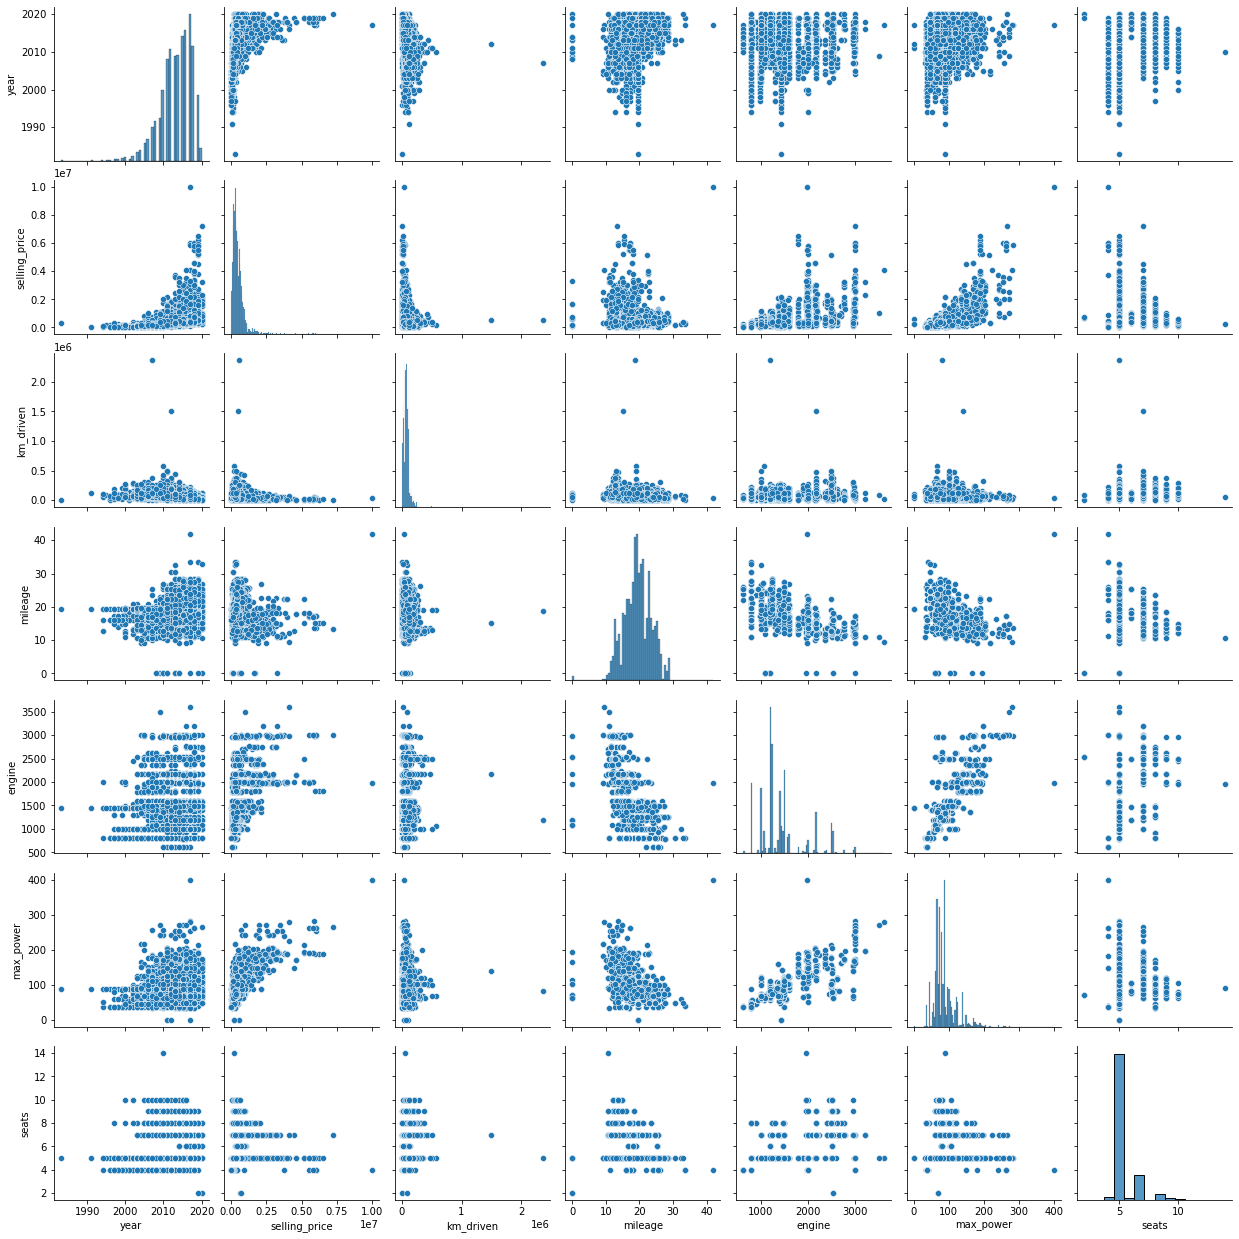

In [37]:
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Что можно сказать о связи предикторов с целевой переменной? - по граффикам видно, что не все признаки хорошо связаны с целевой переменной. Наибольшую, как по мне, связь c целевой переменной max_power, а именно чем больше значение у этой переменной, тем дороже стоит машинаю

А о корреляциях признаков? Не все признаки  коррелируют с целевой переменной. Например у переменной mileage вообще не наблюдаетсся никакой связи, да и у km_driven не сильная зависимость с целевой переменной.


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

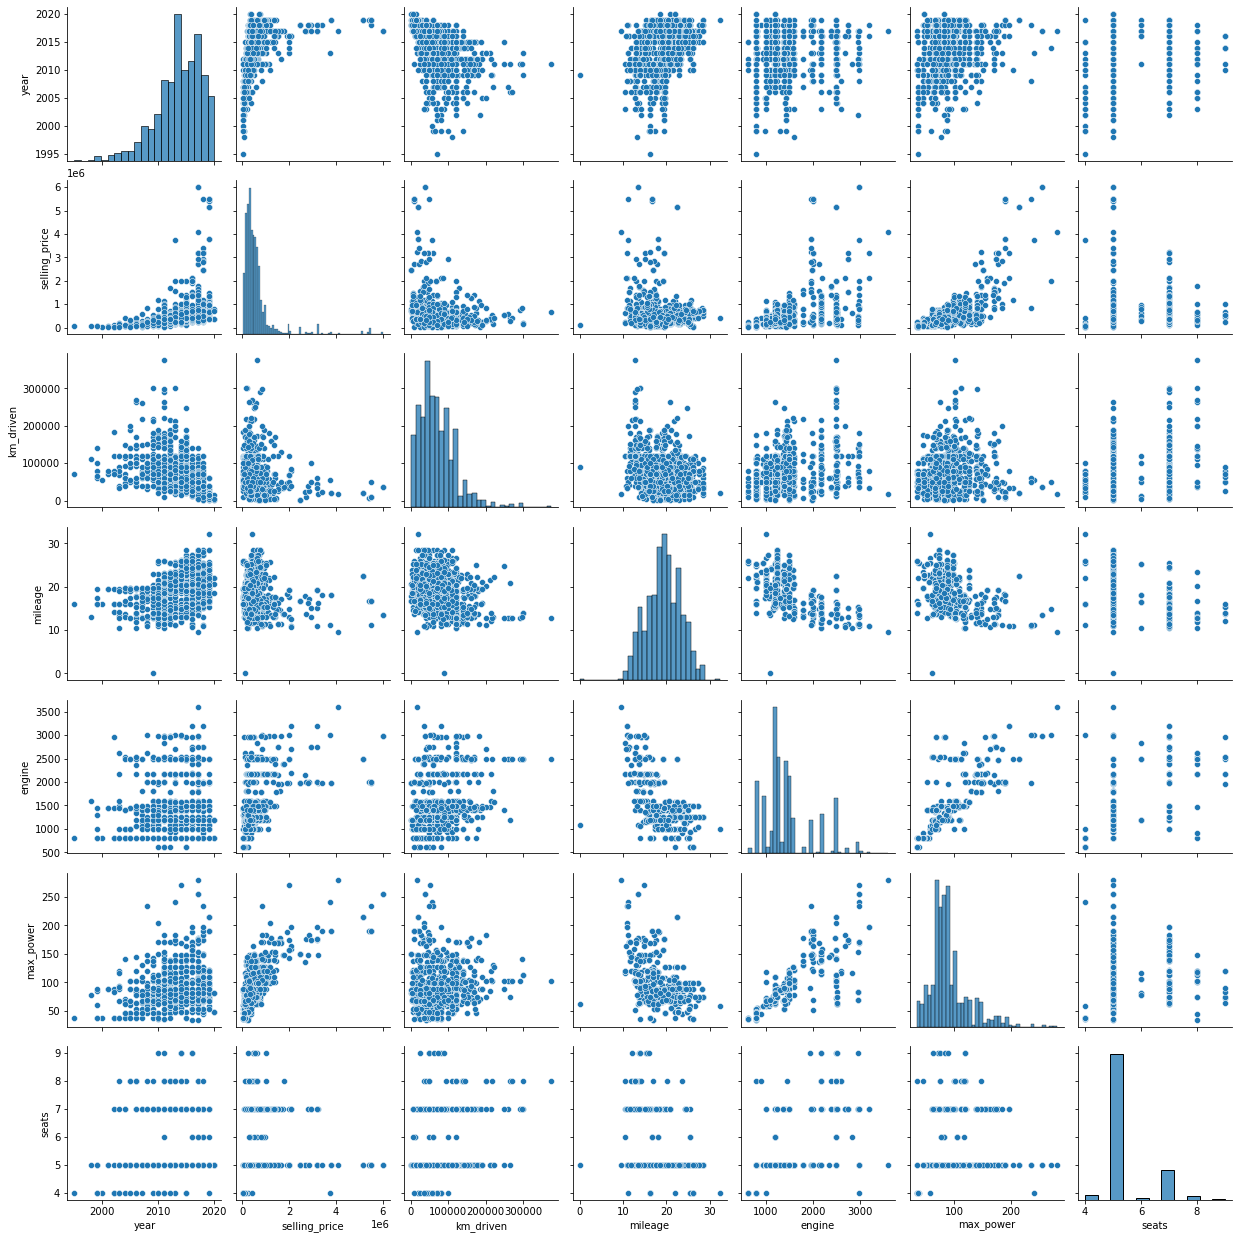

In [38]:
sns.pairplot(df_test)
plt.show()

Похожими ли оказались совокупности при разделении на трейн и тест? Да, связи между переменными похожи в train и test

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

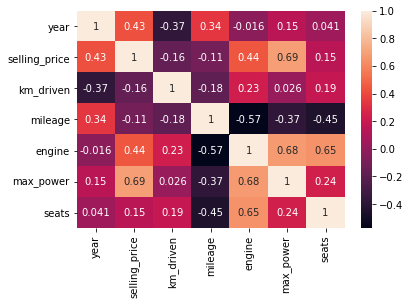

In [39]:
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Какие 2 признака наименее скоррелированы между собой? - Самыми наименее скоррелироваными между собой признаками являются engine и year

Между какими наблюдается довольно сильная положительная линейная зависимость? -  Самыми скоррелироваными между собой признаками являются selling_price и max_power. Так же стоит выделить связь между  max_power и engine, а так же seats и engine. 

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. - 
скорее нет, чем да. Данные признаки имееют отрицательную корреляцую, со значением -0.37. Отрицательная корреляуия говорит нам о том, что переменные меняются в противоположных направлениях.  Однако значение корреляуии не такое большое, чтоб мы утверждали,что чем меньше год, тем, больше километров проехала машина к дате продажи. Однако тендция имеет места жить.


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

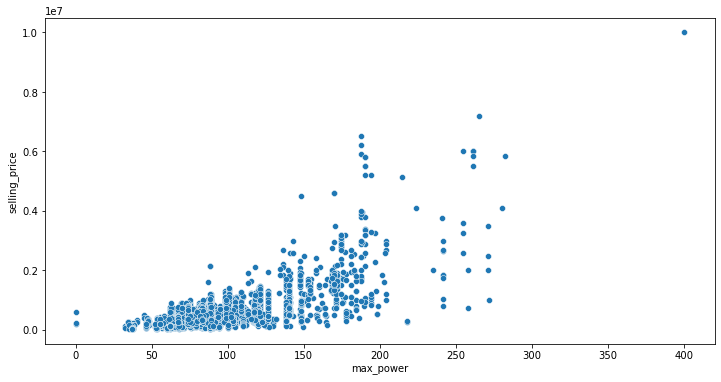

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = df_train["max_power"], y = df_train["selling_price"])
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [41]:
data = df_train.groupby("owner").agg({"selling_price" : "median"}).reset_index()
data = data[data["owner"] != "Test Drive Car"].sort_values(by="selling_price")
data

,owner,selling_price
1,Fourth & Above Owner,175000
4,Third Owner,229999
2,Second Owner,300000
0,First Owner,500000


<AxesSubplot:xlabel='owner', ylabel='selling_price'>

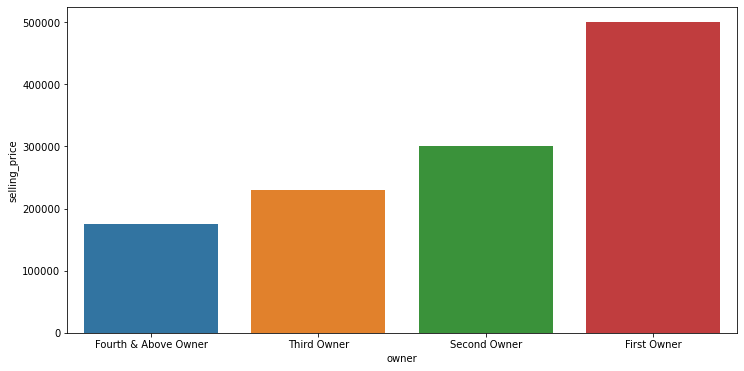

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x = data["owner"], y = data["selling_price"])

Посмотрим на зависимость стоимости машины от количества владельцев. Брал значение по медиане, так как разброс цен был большой. По граффику понятно, что чем меньше владельце, тем больше цена

Теперь посмотрим как сильно отличаются цены в зависимости от трансмиссиии

In [43]:
data_1 = df_train.groupby("transmission").agg({"selling_price" : "median"}).reset_index()
data_1

,transmission,selling_price
0,Automatic,850000
1,Manual,386500


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

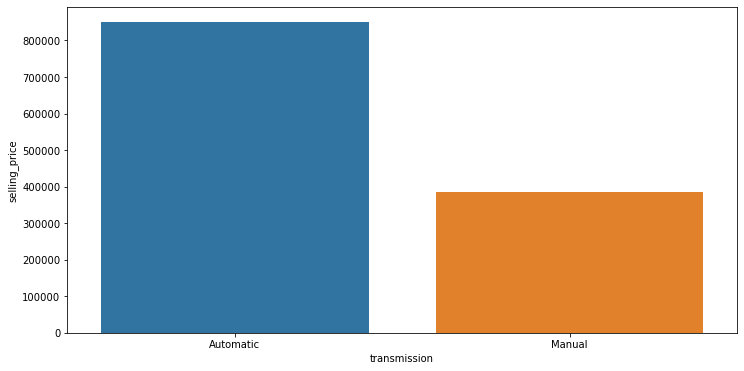

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x = data_1["transmission"], y = data_1["selling_price"])

Как и ожидалось, автомат дороже чем ручник

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [45]:
y_train = df_train["selling_price"]
X_train = df_train.select_dtypes(include="number").drop(columns="selling_price")

In [46]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [47]:
assert X_train.shape == (5840, 6)

In [48]:
y_test = df_test["selling_price"]
X_test = df_test.select_dtypes(include="number").drop(columns="selling_price")

In [49]:
y_test

0      229999
1      665000
2      175000
3      635000
4      130000
        ...  
995    250000
996    440000
997    340000
998    350000
999    700000
Name: selling_price, Length: 1000, dtype: int64

In [50]:
X_test

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.00,2498,112.00,7
1,2017,25000,21.50,1497,108.50,5
2,2007,218463,12.90,1799,130.00,5
3,2015,173000,25.10,1498,98.60,5
4,2011,70000,16.50,1172,65.00,5
...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,5
996,2017,50000,18.60,1197,81.83,5
997,2009,40000,23.00,1396,90.00,5
998,2012,25000,20.36,1197,78.90,5


In [51]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
pred_mse = model_linear.predict(X_test)

In [53]:
print("R2_Test: ",r2_score(y_test, pred_mse))
print("MSE_TEST: ", MSE(y_test, pred_mse))

R2_Test:  0.5937166087588628
MSE_TEST:  233543294967.03186


In [54]:
print("R2_Train: ",r2_score(y_train, model_linear.predict(X_train)))
print("MSE_Train: ", MSE(y_train, model_linear.predict(X_train)))

R2_Train:  0.5920479283423328
MSE_Train:  116934703949.61119


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train = scaler.fit(X_train)
X_train_scaled = data_train.transform(X_train)

data_test = scaler.fit(X_test)
X_test_scaled = data_test.transform(X_test)

In [56]:
X_train_scaled = pd.DataFrame(data=X_train_scaled)
X_train_scaled

,0,1,2,3,4,5
0,0.139570,1.191152,0.995369,-0.386797,-0.446033,-0.434419
1,0.139570,0.766619,0.428330,0.129194,0.487586,-0.434419
2,-0.837167,0.883158,0.895008,-0.081330,0.059994,-0.434419
3,-1.569719,0.766619,-0.836217,-0.283598,0.003066,-0.434419
4,0.872122,-0.482007,0.177427,-0.492059,-0.197447,-0.434419
...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379575,-0.721159,-0.822390,-0.434419
5836,-0.104614,-0.398765,-0.133691,-0.902787,-0.664257,-0.434419
5837,-0.104614,0.600136,-0.234052,-0.492059,-0.166137,-0.434419
5838,-1.569719,0.749971,-0.660586,0.118874,0.692526,-0.434419


In [57]:
X_test_scaled = pd.DataFrame(data=X_test_scaled)
X_test_scaled

,0,1,2,3,4,5
0,-0.917923,1.993453,-1.351971,1.995530,0.603622,1.750206
1,0.827651,-0.957314,0.546863,0.074040,0.503208,-0.441661
2,-1.666026,3.034744,-1.630466,0.653750,1.120035,-0.441661
3,0.328916,2.096627,1.458303,0.075959,0.219181,-0.441661
4,-0.668555,-0.028751,-0.719026,-0.549821,-0.744791,-0.441661
...,...,...,...,...,...,...
995,-1.416658,0.590291,0.118993,-0.714904,-0.657288,-0.441661
996,0.827651,-0.441446,-0.187353,-0.501831,-0.261945,-0.441661
997,-1.167290,-0.647793,0.926630,-0.119837,-0.027550,-0.441661
998,-0.419187,-0.957314,0.258240,-0.501831,-0.346005,-0.441661


In [58]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
pred_mse_norm = model_scaled.predict(X_test_scaled)

In [59]:
print("R2_Test: ",r2_score(y_test, pred_mse_norm))
print("MSE_TEST: ", MSE(y_test, pred_mse_norm))

R2_Test:  0.5652258610022143
MSE_TEST:  249920590349.0454


In [60]:
print("R2_Train: ",r2_score(y_train, model_scaled.predict(X_train_scaled)))
print("MSE_Train: ", MSE(y_train, model_scaled.predict(X_train_scaled)))

R2_Train:  0.5920479283423333
MSE_Train:  116934703949.61104


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [61]:
# your code here

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [62]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
pred_lasso = model_lasso.predict(X_test_scaled)


In [63]:
print("R2_Test: ",r2_score(y_test, pred_lasso))
print("MSE_TEST: ", MSE(y_test, pred_lasso))

R2_Test:  0.5652246054394863
MSE_TEST:  249921312082.3549


In [64]:
print("R2_Train: ",r2_score(y_train, model_lasso.predict(X_train_scaled)))
print("MSE_Train: ", MSE(y_train, model_lasso.predict(X_train_scaled)))

R2_Train:  0.5920479283069197
MSE_Train:  116934703959.76196


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [65]:
model_lasso.coef_

array([158271.29927533, -43329.33666816,  26664.87725063,  61014.07276967,
       321131.43039003, -23028.0417642 ])

Нет, не занулило

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [94]:
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

model_lasso = Lasso()

alphas = np.logspace(-5, 3, 1000)

tuned_parameters = [{"alpha": alphas}]

lasso_regression = GridSearchCV(model_lasso, tuned_parameters, cv=10)

lasso_regression.fit(X_train_scaled, y_train)


best_estim = lasso_regression.best_estimator_

best_estim.fit(X_train_scaled, y_train)

pred_lasso_regression = best_estim.predict(X_test_scaled)



print(lasso_regression.best_params_)
print(lasso_regression.best_score_)
print("--- %s seconds ---" % (time.time() - start_time))



{'alpha': 1000.0}
0.5690347854529082
--- 52.048699140548706 seconds ---


In [95]:
print("R2_Test: ",r2_score(y_test, pred_lasso_regression))
print("MSE_TEST: ", MSE(y_test, pred_lasso_regression))

R2_Test:  0.5639590459839121
MSE_TEST:  250648791796.27713


In [96]:
print("R2_Train: ",r2_score(y_train, lasso_regression.predict(X_train_scaled)))
print("MSE_Train: ", MSE(y_train, lasso_regression.predict(X_train_scaled)))

R2_Train:  0.5920135562008116
MSE_Train:  116944556323.14261


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

--- 21.874874114990234 seconds ---

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

26475.592705670748

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [69]:
from sklearn.linear_model import ElasticNet
start_time = time.time()
alphas = np.logspace(-3, 3, 100)

tuned_parameters = [{"alpha": alphas}]

grid_search_elastic = GridSearchCV(ElasticNet(), tuned_parameters, cv=10, return_train_score=True)

grid_search_elastic.fit(X_train_scaled, y_train)

pred_Elastic_Net = grid_search_elastic.predict(X_test_scaled)


print(grid_search_elastic.best_params_)
print(grid_search_elastic.best_score_)
print("--- %s seconds ---" % (time.time() - start_time))

{'alpha': 0.30538555088334157}
0.5766469626973254
--- 6.736688852310181 seconds ---


In [70]:
print("R2_Test: ",r2_score(y_test, pred_Elastic_Net))
print("MSE_TEST: ", MSE(y_test, pred_Elastic_Net))

R2_Test:  0.5322111420358553
MSE_TEST:  268898393567.28668


In [71]:
print("R2_Train: ",r2_score(y_train, grid_search_elastic.predict(X_train_scaled)))
print("MSE_Train: ", MSE(y_train, grid_search_elastic.predict(X_train_scaled)))

R2_Train:  0.5840889127034208
MSE_Train:  119216062967.31335


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Модели  Lasso, где GridSearchCV(model_lasso, "alpha = 1000" - параметр альфа, cv=10)

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [72]:
X_train_cat = df_train.drop(columns={"name", "selling_price"})
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [73]:
x_df_test = df_test.drop(columns={"name", "selling_price"})

In [74]:
assert X_train_cat.shape == (5840, 10)

In [75]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [76]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = pd.get_dummies(X_train_cat, drop_first=True)
print(X_train_cat.shape)
X_train_cat.head()


x_df_test_cat = pd.get_dummies(x_df_test, drop_first=True)
print(x_df_test.shape)


(5840, 16)
(1000, 10)


In [77]:
X_train_cat

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,5,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,5,1,0,0,1,0,1,0,1,0,0
2,2010,127000,23.00,1396,90.00,5,1,0,0,1,0,1,0,0,0,0
3,2007,120000,16.10,1298,88.20,5,0,0,1,1,0,1,0,0,0,0
4,2017,45000,20.14,1197,81.86,5,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5,0,0,1,1,0,1,0,0,0,0
5836,2013,50000,18.90,998,67.10,5,0,0,1,1,0,1,0,1,0,0
5837,2013,110000,18.50,1197,82.85,5,0,0,1,1,0,1,0,0,0,0
5838,2007,119000,16.80,1493,110.00,5,1,0,0,1,0,1,1,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

start_time = time.time()

model_ridge = Ridge()

alphas = np.logspace(-5, 3, 1000)

tuned_parameteras = [{"alpha": alphas}]

ridge_regression_main = GridSearchCV(model_ridge, tuned_parameters, scoring='r2',cv=10)

ridge_regression_main.fit(X_train_cat, y_train)

pred_ridge_reggression = ridge_regression_main.predict(X_train_cat)



print(ridge_regression_main.best_params_)
print(ridge_regression_main.best_score_)
print("--- %s seconds ---" % (time.time() - start_time))

{'alpha': 7.56463327554629}
0.6031317302969479
--- 4.679620027542114 seconds ---


In [79]:
print("R2_Test: ",r2_score(y_test, ridge_regression_main.predict(x_df_test_cat)))
print("MSE_TEST: ", MSE(y_test, ridge_regression_main.predict(x_df_test_cat)))

R2_Test:  0.6378270779192188
MSE_TEST:  208187337691.05038


In [80]:
print("R2_Test: ",r2_score(y_train, pred_ridge_reggression))
print("MSE_TEST: ", MSE(y_train, pred_ridge_reggression))

R2_Test:  0.6379871607476814
MSE_TEST:  103766758707.50531


Качество предсказания улучшилось

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [81]:
# Добавим новую переменную, а именно число "лошадей" на литр объема 
df_train_update = df_train


df_train_update["max_power_per_litr"] = df_train_update["max_power"]/df_train_update["engine"]


In [82]:
#  зависимость цены от года выглядит квадратичной, а не линейной, значит сделаем квадрат года
df_train_update["year"] = df_train_update["year"]**2




Посмотрим на выбросы и анамалии

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

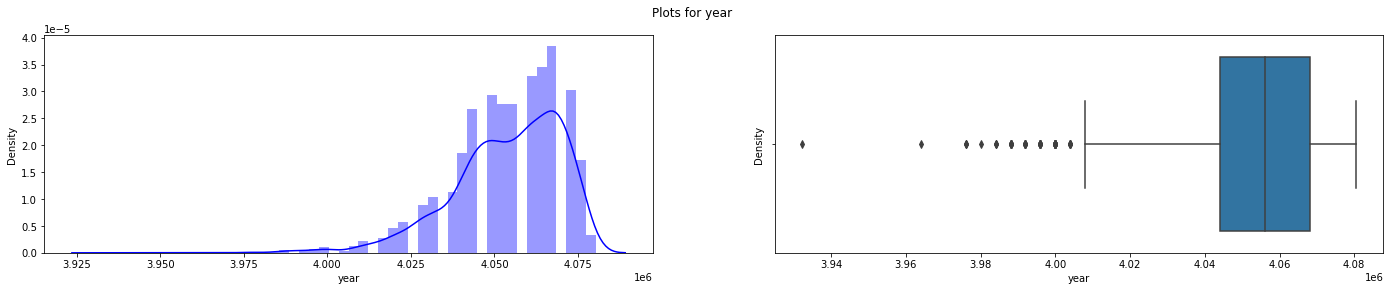

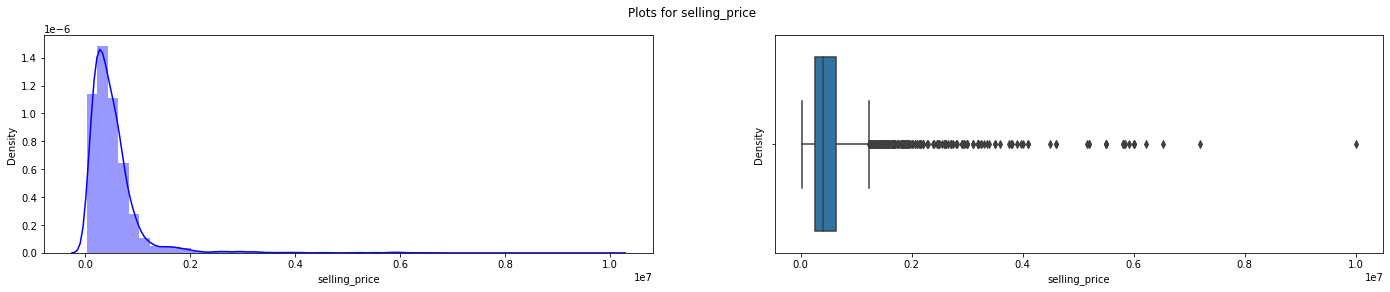

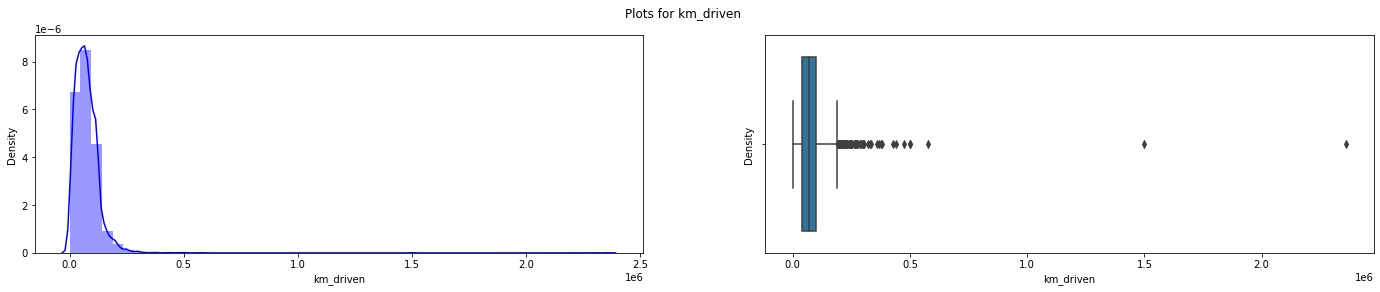

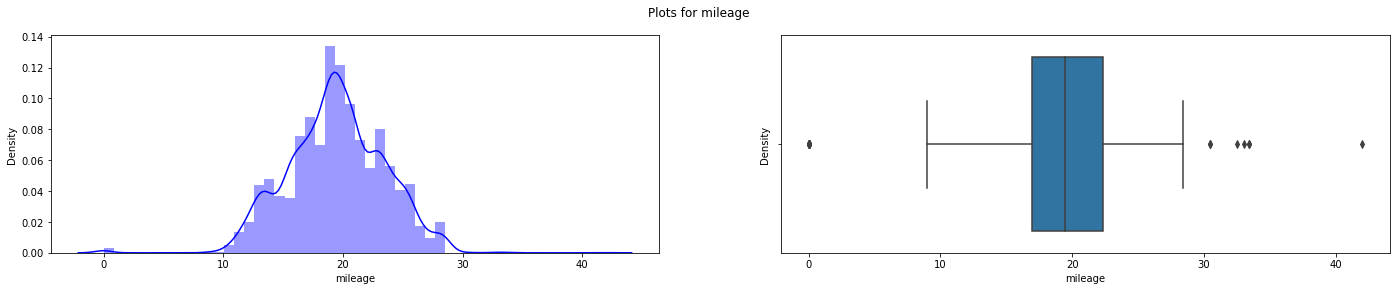

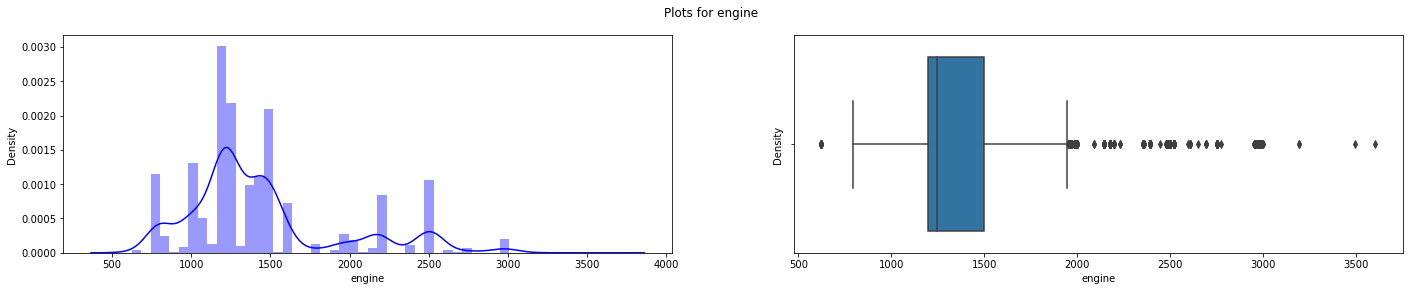

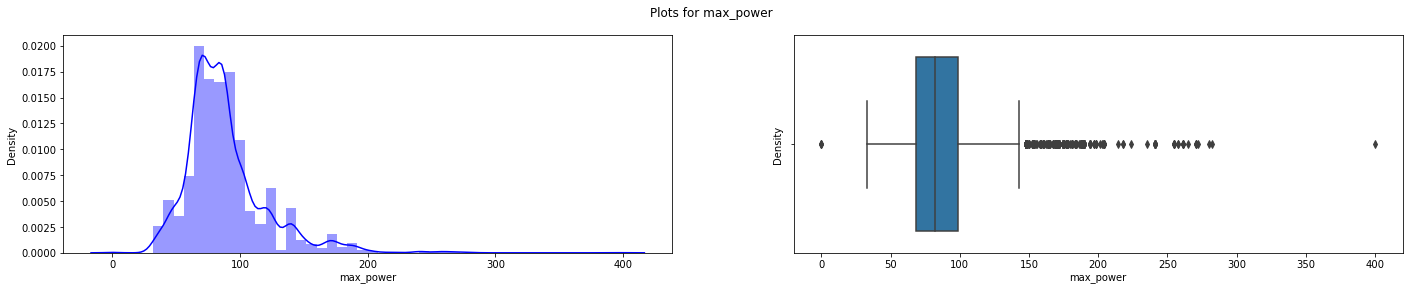

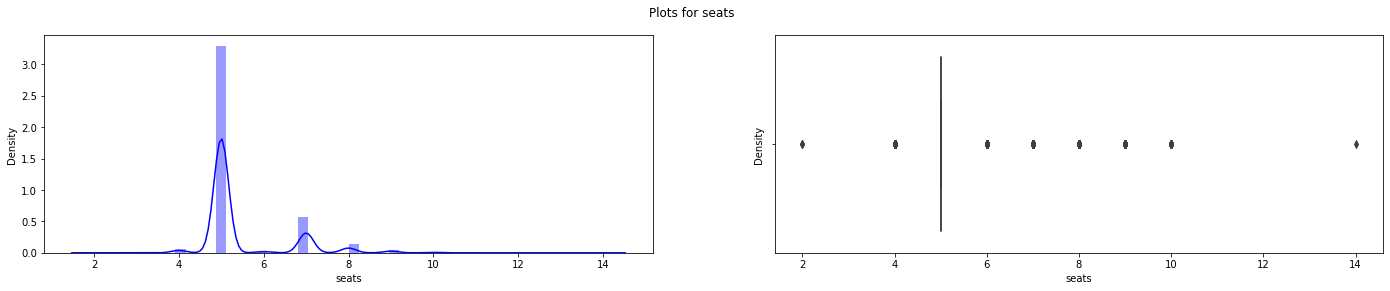

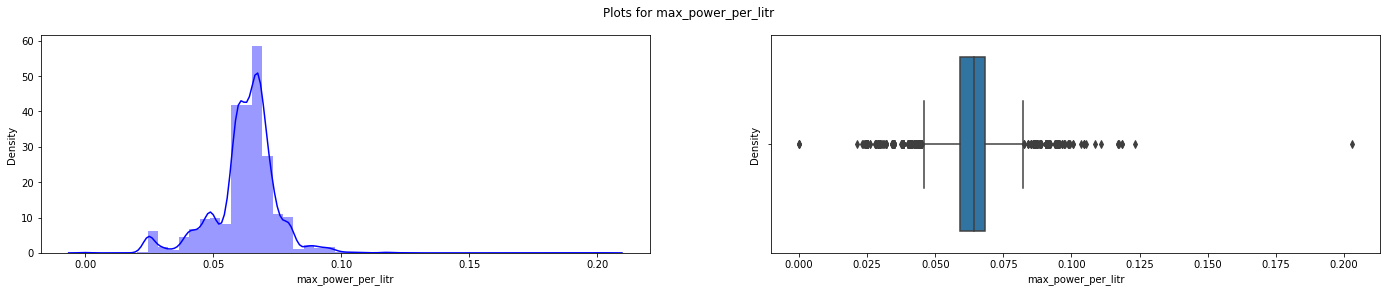

In [83]:
for col in df_train_update.select_dtypes(include='number').columns.tolist():  
    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = (24,4))
    fig.suptitle('Plots for {}'.format(col))
    
    # график распределения
    sns.distplot(df_train[col], color = 'b',  kde = True ,  ax = ax1 )
    plt.ylabel('Density')
    
    # ящик с усами
    sns.boxplot(x = col , data = df_train,ax = ax2)

Попробуем нормализовать наш таргет, цены уж сильно разбросаны

In [84]:
df_train_update["selling_price"] = np.log(df_train_update["selling_price"])


In [85]:
y_df_train_log = df_train_update["selling_price"]
x_df_train_update = df_train_update.drop(columns={"name", "selling_price"})


In [86]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_log = pd.get_dummies(x_df_train_update, drop_first=True)
print(X_train_log.shape)
X_train_log.head()



(5840, 17)


,year,km_driven,mileage,engine,max_power,seats,max_power_per_litr,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,4056196,145500,23.40,1248,74.00,5,0.059295,1,0,0,1,0,1,0,0,0,0
1,4056196,120000,21.14,1498,103.52,5,0.069105,1,0,0,1,0,1,0,1,0,0
2,4040100,127000,23.00,1396,90.00,5,0.064470,1,0,0,1,0,1,0,0,0,0
3,4028049,120000,16.10,1298,88.20,5,0.067951,0,0,1,1,0,1,0,0,0,0
4,4068289,45000,20.14,1197,81.86,5,0.068388,0,0,1,1,0,1,0,0,0,0


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_ridge = Ridge()

alphas = np.logspace(-5, 3, 1000)

tuned_parameteras = [{"alpha": alphas}]

ridge_regression = GridSearchCV(model_ridge, tuned_parameters, scoring='r2',cv=10)

ridge_regression.fit(X_train_log, y_df_train_log)

pred_ridge_reggression_log = ridge_regression.predict(X_train_log)



print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

In [ ]:
print("R2_Train: ",r2_score(y_df_train_log, pred_ridge_reggression_log))
print("MSE_Train: ", MSE(y_df_train_log, pred_ridge_reggression_log))

Наша модель значительно улучшилась на трейне

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [89]:
def business_metrics(y_true, y_pred):
    percent = (abs(y_true - y_pred)) / y_true 
    counts = len(percent[percent <= 0.1])
    metricks = counts/len(percent)
    
    return round(metricks, 3)
    

business_metrics(y_train,pred_ridge_reggression )

0.204

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [97]:
import pickle

pickle.dump(lasso_regression, open('Lasso_Regression_main.pkl', 'wb'))

loaded_model = pickle.load(open('Lasso_Regression_main.pkl', 'rb'))

pickle.dump(ridge_regression, open('Ridge_Regression.pkl', 'wb'))

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    year: int
    km_driven: int
    mileage: float 
    engine: float
    max_power: float
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return 


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return 

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link